## Random initial guesses

### Polynomial function test

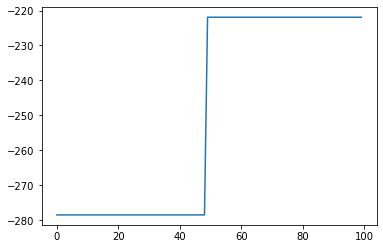

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

def double_well(x, a, b, c, d):
    return a*x**2 + b*x + c*x**4 + d


x = np.linspace(-10, 10, 100)
params = (-10, 4, .1, 0)
# plt.plot(x, double_well(x, *params))

res = minimize(double_well, x0=0, args=params)
# print(res)

N = 100
min = np.array([])
for i in range(N):
    x = np.random.uniform(-10, 10)
    res = minimize(double_well, x0=x, args=params)
    min = np.append(min, res.fun)

plt.plot(np.sort(min))

### 4 site

In [ ]:
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([4], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
G.eq_label = 'eq'
Ntime = 100
c = np.zeros(Ntime)
for i in range(Ntime):
    __, __, info = G.equalzie('Uvt', random=True, callback=True)
    c[i] = info['ctot'][-1]

Initial trap depths: [1.04679623 1.06982687]
Initial trap centers:
[[-1.45093631  0.        ]
 [-0.48886328  0.        ]]
i=50	c=[0.03902523 0.01154433 0.01042806]	c_i=0.06099761885349545	c_i//2-c_i=0.006414662084812776
i=100	c=[3.98414894e-02 4.04823670e-05 1.18697858e-02]	c_i=0.05175175754697037	c_i//2-c_i=0.0014314298556784288
i=150	c=[3.34510341e-02 4.40689547e-03 2.64777562e-05]	c_i=0.037884407298568554	c_i//2-c_i=0.013999430970558696
i=200	c=[3.34354050e-02 4.43010518e-03 2.36351382e-06]	c_i=0.03786787367600962	c_i//2-c_i=0.013401850622737903
i=250	c=[3.33867057e-02 4.50207977e-03 9.20512113e-05]	c_i=0.03798083669277415	c_i//2-c_i=0.0003346218318752772
i=300	c=[0.03345117 0.00944952 0.00031265]	c_i=0.04321334149080629	c_i//2-c_i=-0.005185926530590107
i=350	c=[3.34943125e-02 1.62299151e-04 4.84248391e-05]	c_i=0.03370503651547831	c_i//2-c_i=0.005275635424498076
i=400	c=[3.35026864e-02 1.16154396e-05 3.00936177e-05]	c_i=0.03354439543464425	c_i//2-c_i=0.004320916838813832
i=450	c=[3.

(0.03, 0.04)

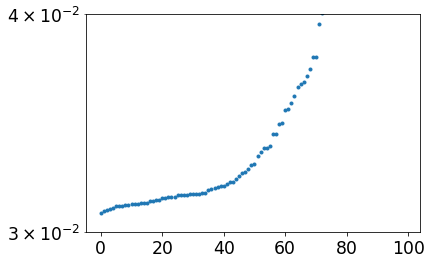

In [ ]:
cs = np.sort(c)
plt.plot(cs, '.')
plt.yscale('log')
plt.ylim(0.03, 0.05)

### 3 site

In [1]:
import numpy as np
from Hubbard.plot import *

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
G.eq_label = 'eq'
Ntime = 100
v0, bounds = G.init_guess()
v0_len = v0.shape[0]
c = np.zeros((Ntime, 1 + 2 * v0_len))
for i in range(Ntime):
    __, __, info = G.equalzie('UTv', random=True, callback=True)
    c[i, -1] = info['ctot'][-1]
    c[i, :v0_len] = info['x'][0]
    c[i, v0_len:-1] = info['x'][-1]


Initial trap depths: [1.07112456 1.082445  ]
Initial trap centers:
[[-0.95904614  0.        ]
 [ 0.00607272  0.        ]]
i=50	c=[0.07897226 0.13107538 0.10601131]	c_i=0.31605895059755273	c_i//2-c_i=-0.09384883377250242
i=100	c=[0.07706319 0.00033749 0.10821186]	c_i=0.18561253984848758	c_i//2-c_i=0.01659159404480015
i=150	c=[7.70604301e-02 6.54765371e-06 1.08217431e-01]	c_i=0.18528440921399167	c_i//2-c_i=3.7468906693427506e-06
Initial trap depths: [1.02258685 1.07365862]
Initial trap centers:
[[-1.05343063  0.        ]
 [-0.07483     0.        ]]
i=50	c=[0.09397882 0.06957237 0.04592193]	c_i=0.20947312979282343	c_i//2-c_i=-0.060268477034590456
i=100	c=[8.99679478e-02 9.16220950e-06 4.23456647e-02]	c_i=0.13232277476856533	c_i//2-c_i=0.007721928516823545
i=150	c=[8.99674086e-02 1.02257966e-07 4.23451508e-02]	c_i=0.1323126616625368	c_i//2-c_i=0.07897304245238243
i=200	c=[8.99674057e-02 1.61151663e-07 4.23451586e-02]	c_i=0.13231272546497638	c_i//2-c_i=1.0381960995620165e-06
Initial trap de

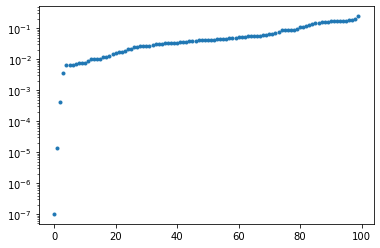

In [2]:
cs = np.sort(c[:, -1])
plt.plot(cs, '.')
plt.yscale('log')
# plt.ylim(0.03, 0.05)

In [6]:
cidx = np.argmin(c[:, -1])
print('x0 =', c[cidx, :v0_len])
print('x =', c[cidx, v0_len:-1])
print('f =', c[cidx, -1])

x0 = [ 0.97900884  0.91538811 -0.99617662  0.          0.04307587  0.        ]
x = [ 0.92488158  0.94437059 -0.98673657  0.          0.04486531  0.        ]
f = 1.0191561289905058e-07


In [1]:
import numpy as np
from Hubbard.plot import *

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v, fix_u, fix_t, fix_v = G.str_to_flags('UTv')

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks,  txTarget, tyTarget = G.xy_links(nnt)
    if not fix_t:
        txTarget, tyTarget = None, None
else:
    nnt, xlinks, ylinks, txTarget, tyTarget = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget,  txTarget, tyTarget), (u, t, v), unitary=x0)

    return c


offset = np.array([0.92488158,  0.94437059, -0.98673657,
                  0.,          0.04486531,  0.])
cost_func(offset, None)

print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')

V = [-40.86928452 -40.86928344 -40.86928452]
t = [0.23182604 0.23182604]
U = [2.06535029 2.06535042 2.06535029]
V_err = 1.2408241353335198e-08
t_err = 7.805172172317149e-16
U_err = 2.9069117219819897e-08
